<a href="https://colab.research.google.com/github/vrjpt10/British-Airways-Virtual-Internship/blob/main/Task_1_British_airways_virtual_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [65]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [66]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Boarding at Mumbai was chaot...
1,"Not Verified | Mexico City Airport is a zoo, b..."
2,"✅ Trip Verified | Very poor service, very fru..."
3,Not Verified | Generally poor. Sent to gate o...
4,Not Verified | BA changed our prepaid seats a...


In [74]:
df.to_csv("/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning

Using the Natural Language Toolkit (NLTK) library for data cleaning

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re


In [79]:
df['reviews'] = df['reviews'].apply(lambda x: x.split('|')[-1].strip())
df.head()

In [52]:
# Download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [81]:
# Clean the reviews
def clean_reviews(review):
    # Convert to lowercase
    review = review.lower()
    # Remove punctuations and special characters
    review = re.sub(r'[^\w\s]', '', review)
    # Tokenize into individual words
    tokens = word_tokenize(review)
    # Remove stop words and perform lemmatization
    clean_review = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the words back into a string
    clean_review = ' '.join(clean_review)
    return clean_review

In [84]:
df['clean_reviews'] = df['reviews'].apply(lambda x: clean_reviews(x))
df.head()

,Unnamed: 0,reviews,clean_reviews
0,0,Boarding at Mumbai was chaotic and badly organ...,boarding mumbai chaotic badly organised board ...
1,1,"Mexico City Airport is a zoo, but taking the l...",mexico city airport zoo taking late departure ...
2,2,"Very poor service, very frustrating. Firstly m...",poor service frustrating firstly flight lhr ca...
3,3,"Generally poor. Sent to gate on time, sat mayb...",generally poor sent gate time sat maybe 30 min...
4,4,BA changed our prepaid seats at the last minut...,ba changed prepaid seat last minute charged u ...


In [85]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk import pos_tag

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS_tagged'] = df['clean_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Unnamed: 0,reviews,clean_reviews,POS_tagged
0,0,Boarding at Mumbai was chaotic and badly organ...,boarding mumbai chaotic badly organised board ...,"[(boarding, v), (mumbai, r), (chaotic, a), (ba..."
1,1,"Mexico City Airport is a zoo, but taking the l...",mexico city airport zoo taking late departure ...,"[(mexico, a), (city, n), (airport, n), (zoo, v..."
2,2,"Very poor service, very frustrating. Firstly m...",poor service frustrating firstly flight lhr ca...,"[(poor, a), (service, n), (frustrating, v), (f..."
3,3,"Generally poor. Sent to gate on time, sat mayb...",generally poor sent gate time sat maybe 30 min...,"[(generally, r), (poor, a), (sent, a), (gate, ..."
4,4,BA changed our prepaid seats at the last minut...,ba changed prepaid seat last minute charged u ...,"[(ba, r), (changed, v), (prepaid, v), (seat, n..."


In [86]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,Unnamed: 0,reviews,clean_reviews,POS_tagged,Lemma
0,0,Boarding at Mumbai was chaotic and badly organ...,boarding mumbai chaotic badly organised board ...,"[(boarding, v), (mumbai, r), (chaotic, a), (ba...",board mumbai chaotic badly organise board cr...
1,1,"Mexico City Airport is a zoo, but taking the l...",mexico city airport zoo taking late departure ...,"[(mexico, a), (city, n), (airport, n), (zoo, v...",mexico city airport zoo take late departure ...
2,2,"Very poor service, very frustrating. Firstly m...",poor service frustrating firstly flight lhr ca...,"[(poor, a), (service, n), (frustrating, v), (f...",poor service frustrate firstly flight lhr ca...
3,3,"Generally poor. Sent to gate on time, sat mayb...",generally poor sent gate time sat maybe 30 min...,"[(generally, r), (poor, a), (sent, a), (gate, ...",generally poor sent gate time sit maybe 30 m...
4,4,BA changed our prepaid seats at the last minut...,ba changed prepaid seat last minute charged u ...,"[(ba, r), (changed, v), (prepaid, v), (seat, n...",ba change prepay seat last minute charge u s...


In [87]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Boarding at Mumbai was chaotic and badly organ...,board mumbai chaotic badly organise board cr...
1,"Mexico City Airport is a zoo, but taking the l...",mexico city airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstly m...",poor service frustrate firstly flight lhr ca...
3,"Generally poor. Sent to gate on time, sat mayb...",generally poor sent gate time sit maybe 30 m...
4,BA changed our prepaid seats at the last minut...,ba change prepay seat last minute charge u s...
...,...,...
1995,"New York JFK - London Heathrow, BA174, Club Wo...",new york jfk london heathrow ba174 club worl...
1996,Basel to London Heathrow with British Airways....,basel london heathrow british airway 1130am ...
1997,Flew British Airways from London to Calgary. F...,flew british airway london calgary flight b ...
1998,London Heathrow to Boston. My complaint is abo...,london heathrow boston complaint service rud...


### Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [88]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 11.6 MB/s eta 0:00:00


In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,clean_reviews,POS_tagged,Lemma,Sentiment,Analysis
0,0,Boarding at Mumbai was chaotic and badly organ...,boarding mumbai chaotic badly organised board ...,"[(boarding, v), (mumbai, r), (chaotic, a), (ba...",board mumbai chaotic badly organise board cr...,0.9913,Positive
1,1,"Mexico City Airport is a zoo, but taking the l...",mexico city airport zoo taking late departure ...,"[(mexico, a), (city, n), (airport, n), (zoo, v...",mexico city airport zoo take late departure ...,0.9940,Positive
2,2,"Very poor service, very frustrating. Firstly m...",poor service frustrating firstly flight lhr ca...,"[(poor, a), (service, n), (frustrating, v), (f...",poor service frustrate firstly flight lhr ca...,-0.9442,Negative
3,3,"Generally poor. Sent to gate on time, sat mayb...",generally poor sent gate time sat maybe 30 min...,"[(generally, r), (poor, a), (sent, a), (gate, ...",generally poor sent gate time sit maybe 30 m...,-0.4588,Negative
4,4,BA changed our prepaid seats at the last minut...,ba changed prepaid seat last minute charged u ...,"[(ba, r), (changed, v), (prepaid, v), (seat, n...",ba change prepay seat last minute charge u s...,0.6908,Positive


In [90]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1037
Negative     723
Neutral      240
Name: Analysis, dtype: int64

### Visual Representation

([<matplotlib.patches.Wedge at 0x7f812892de50>,
 [Text(-0.06389532256449629, 1.0981426991763772, 'Positive'),
  Text(-0.3448450348848735, -1.0445486594291578, 'Negative'),
  Text(1.255198143812974, -0.4969684293478457, 'Neutral')],
 [Text(-0.03485199412608888, 0.5989869268234783, '51.8%'),
  Text(-0.18809729175538553, -0.569753814234086, '36.1%'),
  Text(0.7903099424007615, -0.3129060481079028, '12.0%')])

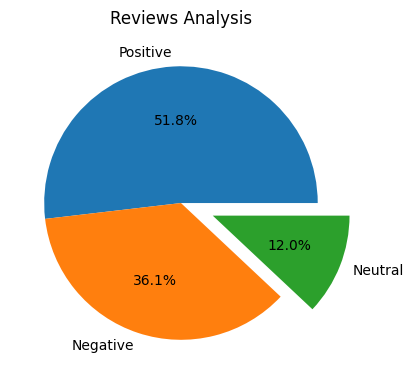

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [92]:
df.to_csv("BA_reviews.csv")

### Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

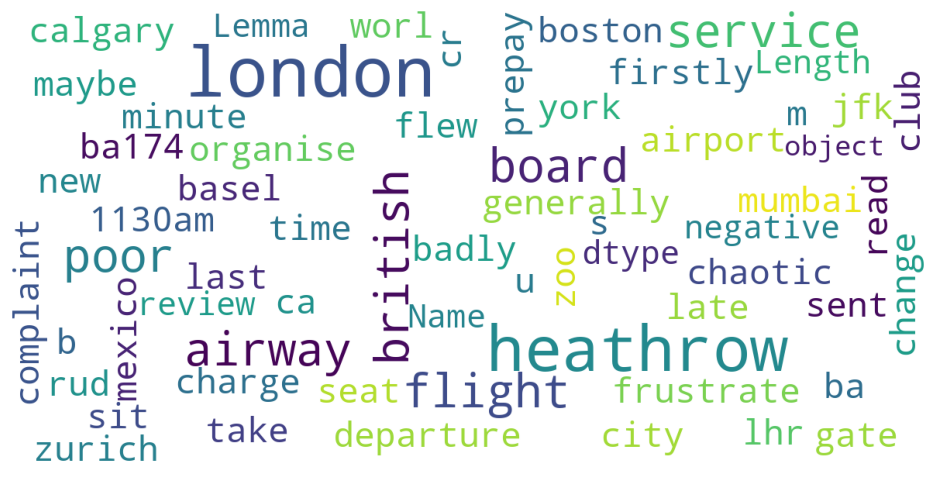

In [93]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)